In [ ]:
# Python Homework 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (10 Points)

1. Simulate three different paths (realizations) of a standard Brownian motion on $[0,1]$ and plot your results in one graph.

_Hint:_ Discretize the time interval $[0,1]$ in sufficiently small subintervals of same length with stepsize $1/n$, i.e., choose a sufficiently large number of steps $n$ (e.g., $n=10000$).


In [ ]:
np.random.seed(1123)

def get_X(std):

    # Generate an array of Poisson random variables for each subinterval
    return np.random.normal(0, std)

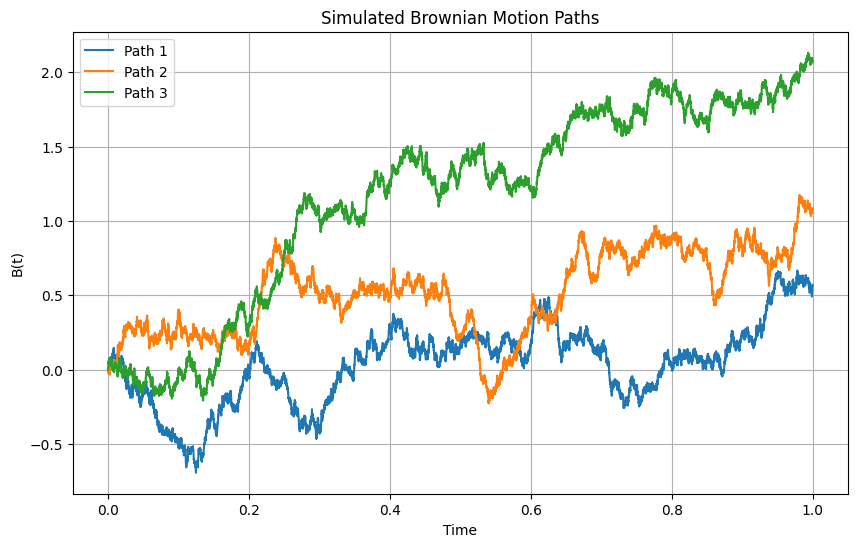

In [ ]:
# Split interval [0,T] into n subintervals of length $\delta_t = \frac{T}{n}$
T = 1
n = 10000  # Number of intervals
delta_t = T/n

# Function to simulate one path of Brownian motion
def simulate_brownian_motion(n, delta_t):
    B = np.zeros(n+1)
    for i in range(1, n+1):
        delta_B = get_X(np.sqrt(delta_t))
        B[i] = B[i-1] + delta_B
    return B

# Simulate three different paths of standard Brownian motion
B1 = simulate_brownian_motion(n, delta_t)
B2 = simulate_brownian_motion(n, delta_t)
B3 = simulate_brownian_motion(n, delta_t)

# Time values for plotting
t_values = np.linspace(0, T, n+1)

# Plotting the three paths of Brownian motion
plt.figure(figsize=(10, 6))
plt.plot(t_values, B1, label='Path 1')
plt.plot(t_values, B2, label='Path 2')
plt.plot(t_values, B3, label='Path 3')
plt.title('Simulated Brownian Motion Paths')
plt.xlabel('Time')
plt.ylabel('B(t)')
plt.legend()
plt.grid(True)
plt.show()


2. A two-dimensional (standard) Brownian motion $(B_t)_{t \geq 0} = ((B^1_t, B^2_t))_{t \geq 0}$ with values in $\mathbb{R}^2$ is given by two one-dimensional $\mathbb{R}$-valued independent (standard) Brownian motions $(B^1_t)_{t \geq 0}$ and $(B^2_t)_{t \geq 0}$. Simulate a realization of a two-dimensional (standard) Brownian motion on the $\mathbb{R}^2$ plane for $t$ running from $0$ to $1$ and plot your result.

<i>Hint:</i> You can use your implementation from 1.

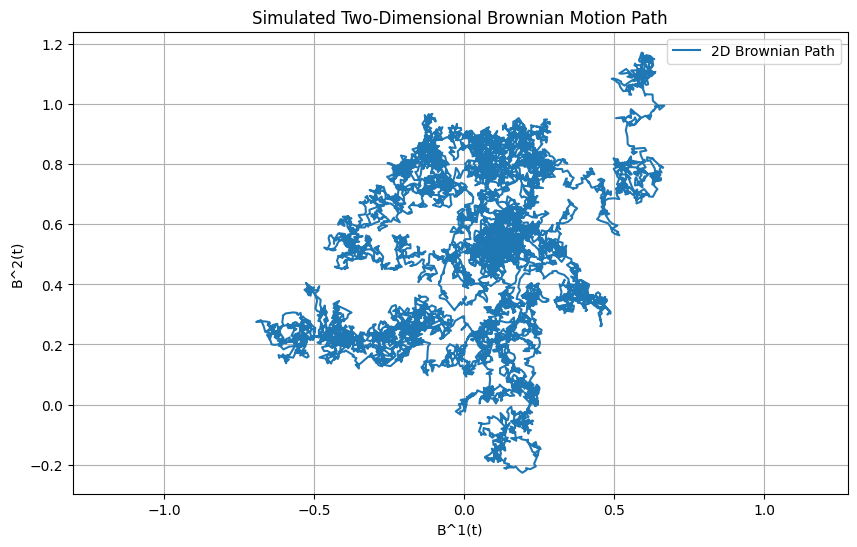

In [ ]:
np.random.seed(1123)
# Simulate a two-dimensional Brownian motion by using implementation from 1
B1_2d, B2_2d = B1, B2

# Plotting the two-dimensional Brownian motion path
plt.figure(figsize=(10, 6))
plt.plot(B1_2d, B2_2d, label='2D Brownian Path')
plt.title('Simulated Two-Dimensional Brownian Motion Path')
plt.xlabel('B^1(t)')
plt.ylabel('B^2(t)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Problem 2 (10 Points)

Let $(B_t)_{t \geq 0}$ be a standard Brownian motion. For $\mu \in \mathbb{R}$ and $\sigma \in \mathbb{R}_+$, the process $(X_t)_{t \geq 0}$ defined by

$$ X_t = \mu t + \sigma B_t \qquad (t \geq 0)$$

is called __Brownian motion with drift parameter $\mu$ and variance parameter $\sigma^2$__. Moreover, the process $(S_t)_{t \geq 0}$ defined by

$$ S_t = S_0 \cdot e^{X_t} \qquad (t \geq 0)$$

with starting value $S_0 > 0$ is called __geometric Brownian motion__.



1. Simulate a path of a geometric Brownian motion $(S_t)_{0 \leq t \leq T}$ with parameters $\mu = 0.1, \sigma = 0.176, S_0 = 1125$ on the time interval $[0,5/12]$ (i.e. $T=5/12$). Plot the result.

_Hint:_ Similar to Problem 1 above, discretize the time interval $[0,5/12]$ in sufficiently small subintervals of same length with stepzise $T/n$ (e.g., $n=10000$).  

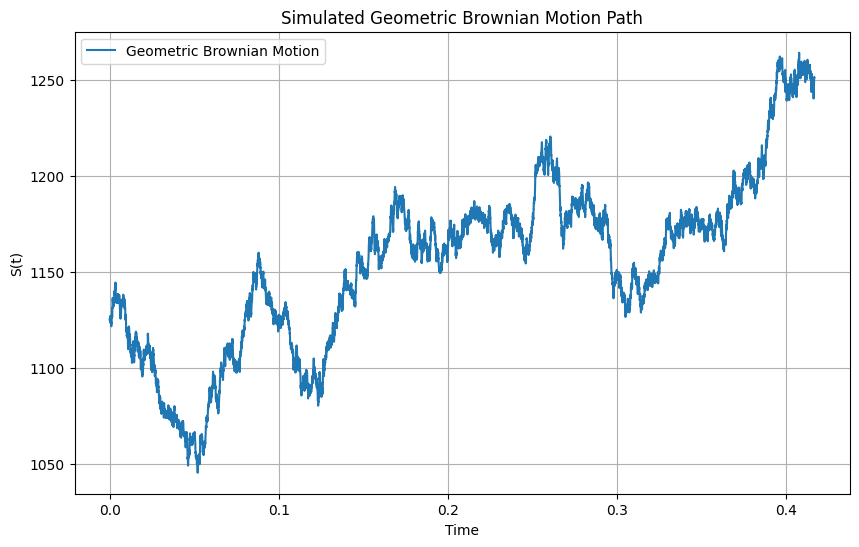

In [ ]:
np.random.seed(1123)
# Set the parameters
mu = 0.1
sigma = 0.176
S0 = 1125
T = 5/12
n = 10000  # Number of intervals
delta_t = T/n

# Function to simulate geometric Brownian motion
def simulate_geometric_brownian_motion(S0, mu, sigma, T, n):
    S = np.zeros(n+1)
    S[0] = S0
    B_t = simulate_brownian_motion(n, delta_t)
    for i in range(1, n+1):
        # Calculate X_t based on the given equation without variance adjustment
        X_t = (mu) * i * delta_t + sigma * B_t[i]
        # Update the process S_t using the exponential of X_t
        S[i] = S0 * np.exp(X_t)

    return S

# Simulate paths of geometric Brownian motion
S = simulate_geometric_brownian_motion(S0, mu, sigma, T, n)

# Time values for plotting
t_values = np.linspace(0, T, n+1)

# Plotting the path of geometric Brownian motion
plt.figure(figsize=(10, 6))
plt.plot(t_values, S, label='Geometric Brownian Motion')
plt.title('Simulated Geometric Brownian Motion Path')
plt.xlabel('Time')
plt.ylabel('S(t)')
plt.legend()
plt.grid(True)
plt.show()

2. In the model introduced by Fisher Black, Myron Scholes, and Robert Merton (1973) for pricing so-called *stock options*, stock price processes are modeled as geometric Brownian motions. A stock option is a contract that gives the buyer of the option the right to receive a certain pre-determined payoff at a future point in time from the option's seller. Typically, the payoff depends on the future evolution of an underlying stock price: For example, a so-called *lookback option* on a stock with maturity $T=5/12$ pays the buyer of the option the payoff $$ S_{5/12} - \min_{t \, \in\, [0,5/12]} S_t$$ at time $T=5/12$, where $(S_t)_{t \geq 0}$ denotes the price process of the underlying stock. Find an approximation of the future expected payoff of this option by running 10000 simulations. Assume that the price follows a geometric Brownian motion with parameters as given in 1.

In [ ]:
np.random.seed(1123)
# Set the parameters
mu = 0.1
sigma = 0.176
S0 = 1125
T = 5/12
n = 10000  # Number of intervals
delta_t = T/n

# Define the payoff function for a single simulation
def payoff(S0, mu, sigma, T, n):
    S = simulate_geometric_brownian_motion(S0, mu, sigma, T, n)
    payoff_value = S[-1] - np.min(S)
    return payoff_value

In [ ]:
# Simulate the expected payoff over many simulations
def simulate_payoff(S0, mu, sigma, T, n, simulations):
    payoffs = np.zeros(simulations)
    for i in range(simulations):
        payoffs[i] = payoff(S0, mu, sigma, T, n)
    return payoffs


In [ ]:
# Set the parameters for the simulations
simulations = 10000
# Simulate the payoffs
simulated_payoffs = simulate_payoff(S0, mu, sigma, T, n, simulations)
# Calculate the expected payoff
expected_payoff = np.mean(simulated_payoffs)

print("The expected payoff is:", expected_payoff)

The expected payoff is: 131.16304108051486
